# Explore here

In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

artist_id = "6RHTUrRF63xao58xh9FXYJ"
canciones = []
popularidad = []
duracion = []

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(artist_id)

for track in results['tracks'][:10]:
    canciones.append(track['name'])
    popularidad.append(track['popularity'])
    duracion.append(track['duration_ms']/(1000*60)%60)

datos = {
    'Titles': canciones,
    'Popularidad': popularidad,
    'Duracion': duracion
}

df = pd.DataFrame(datos)
df = df.sort_values(by = 'Popularidad')
print(df)

           Titles  Popularidad  Duracion
9  Off The Record           60  3.145550
7          Kitsch           64  3.257333
8        Accendio           64  3.200217
6          Baddie           65  2.572667
4       해야 (HEYA)           67  3.161333
5          ELEVEN           67  2.974217
2      After LIKE           70  2.949550
3       LOVE DIVE           70  2.953100
1            I AM           72  3.064217
0  Supernova Love           74  3.325067


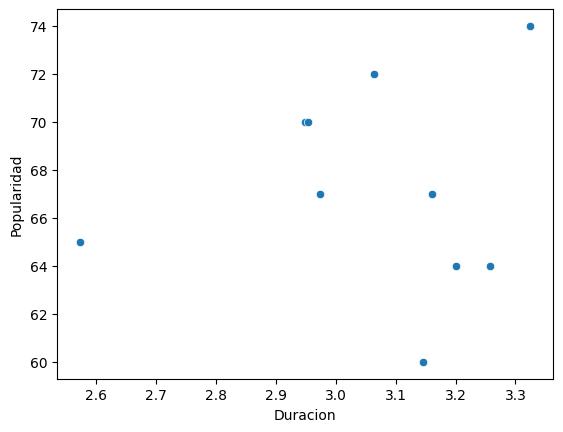

In [9]:
scatter_plot = sns.scatterplot(data = df, y ='Popularidad', x = 'Duracion')

# Etiquetas y título
fig = scatter_plot.get_figure()

### Conclusiones

El índice de popularidad de Spotify indica que entre más alto sea el índice (en escala de 0-100), más relevante será el artistas respecto a canciones o artistas similares. Según la gráfica obtenida, no hay relación directa entre la duración de las canciones con respecto a su popularidad en cuanto a este artista, pues se ha demostrado que las canciones más largas no son más ni menos populares que las más cortas.